In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data Source.xlsx to Data Source.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
xls = pd.ExcelFile('Data Source.xlsx',engine='openpyxl')

print(xls.sheet_names)

['Domestic Sales ', 'Retail-July 25', 'Festive Data']


In [5]:
df = pd.read_excel('Data Source.xlsx',sheet_name = 'Domestic Sales ', engine='openpyxl')
df.head()

,Category,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
0,Passenger Vehicles,2773519,2711457,3069523,3890114,"42 18,750",4301848
1,Commercial Vehicles,717593,568559,716566,962468,968770,956671
2,Three Wheelers,637065,219446,261385,488768,694801,741420
3,Two Wheelers,17416432,15120783,13570008,15862771,17974365,19607332
4,Quadricycles,942,-12,124,725,725,120


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  6 non-null      object
 1   2019-20   6 non-null      int64 
 2   2020-21   6 non-null      int64 
 3   2021-22   6 non-null      int64 
 4   2022-23   6 non-null      int64 
 5   2023-24   6 non-null      object
 6   2024-25   6 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 468.0+ bytes


In [9]:
df.dropna(axis =1,inplace=True)

In [10]:
df.head(6)

,Category,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
0,Passenger Vehicles,2773519,2711457,3069523,3890114,"42 18,750",4301848
1,Commercial Vehicles,717593,568559,716566,962468,968770,956671
2,Three Wheelers,637065,219446,261385,488768,694801,741420
3,Two Wheelers,17416432,15120783,13570008,15862771,17974365,19607332
4,Quadricycles,942,-12,124,725,725,120
5,Grand Total,21545551,18620233,17617606,21204846,23857411,25607391


In [11]:
df.columns

Index(['Category', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24',
       '2024-25'],
      dtype='object')

In [12]:
df.info

<bound method DataFrame.info of               Category   2019-20   2020-21   2021-22   2022-23    2023-24  \
0   Passenger Vehicles   2773519   2711457   3069523   3890114  42 18,750   
1  Commercial Vehicles    717593    568559    716566    962468     968770   
2       Three Wheelers    637065    219446    261385    488768     694801   
3         Two Wheelers  17416432  15120783  13570008  15862771   17974365   
4         Quadricycles       942       -12       124       725        725   
5          Grand Total  21545551  18620233  17617606  21204846   23857411   

    2024-25  
0   4301848  
1    956671  
2    741420  
3  19607332  
4       120  
5  25607391  >

In [13]:
df.columns

Index(['Category', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24',
       '2024-25'],
      dtype='object')

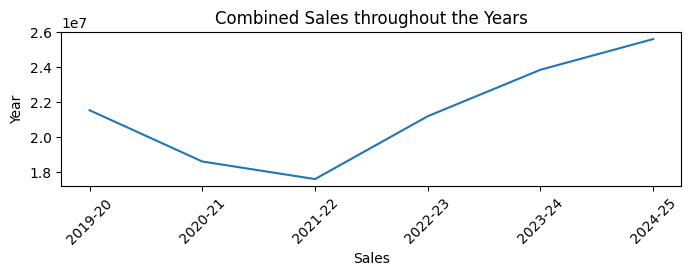

In [21]:
year_cols = ['2019-20', '2020-21', '2021-22', '2022-23', '2023-24','2024-25']

grand_total = df[df['Category'].str.lower() == 'grand total']

sales = grand_total[year_cols].values.flatten()


plt.figure(figsize=(8,2))



plt.plot(year_cols,sales)

plt.ylabel('Year')
plt.xlabel('Sales')
plt.title("Combined Sales throughout the Years")
plt.xticks(rotation=45)

plt.show()


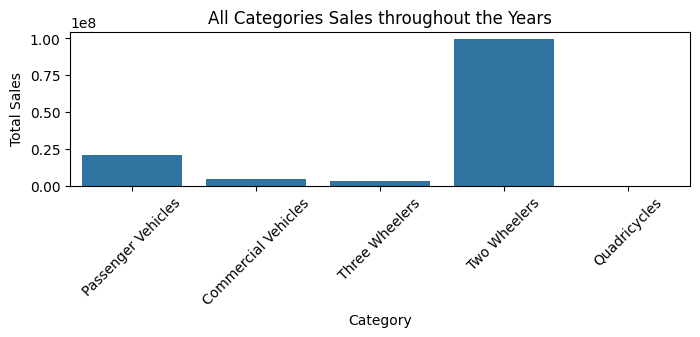

In [22]:
year_cols = ['2019-20', '2020-21', '2021-22', '2022-23', '2023-24','2024-25']

for col in year_cols:
        df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '').astype(float)



df['Total_Sales'] = df[year_cols].sum(axis=1)

df_Cat=df[df['Category'].str.lower() != 'grand total']

plt.figure(figsize=(8,2))

sns.barplot(x='Category',y='Total_Sales',data = df_Cat)


plt.title('Sales by Category across years')
plt.ylabel('Sales')
plt.title("All Categories Sales throughout the Years")
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()
